<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [15]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000000120317561, 1.2499999939841218, 0.5000000120317564]
  * f(x_sol) = 2.2499998917141943
  * nb_iters = 8
  * flag     = 1
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000002259296457, 1.249999887035177, 0.5000002259296459]
  * f(x_sol) = 2.2499979666336474
  * nb_iters = 7
  * flag     = 1
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 0.008615664513970852
  * nb_iters = 4
  * flag     = 1
  * solution = [0.9072339605110892, 0.8227554

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

### 1.

-------------------------------------------------------------------------
Résultats de : Lagrangien augmente appliqué à f1:
  * x0       = [1, 1, 1]
  * x_sol    = [0.5000000001690699, 1.249999999915465, 0.5000000001690699]
  * f(x_sol) = 2.2499999984783714
  * nb_iters = 10
  * flag     = 1
  * solution = [0.5, 1.25, 0.5]


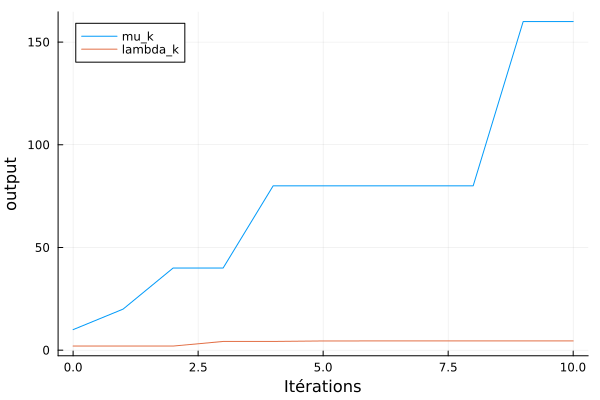

In [16]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using LinearAlgebra
using Plots

f = fct1
gradf=grad_fct1
hessf = hess_fct1

c = contrainte1
gradc = grad_contrainte1
hessc = hess_contrainte1

x0 = [1,1,1]
x_sol, f_sol, flag, nb_iters, mus, lambdas = lagrangien_augmente(
    f,
    gradf,
    hessf,
    c,
    gradc,
    hessc,
    x0;
    tau=2,
)

afficher_resultats("Lagrangien augmente", "f1", x0, x_sol, f_sol, flag, nb_iters, sol_fct1_augm)
plot(0:nb_iters, mus, xlabel="Itérations", ylabel="output", label="mu_k")
plot!(0:nb_iters, lambdas, label="lambda_k")




-------------------------------------------------------------------------
Résultats de : Lagrangien augmente appliqué à f2:
  * x0       = [5, 5]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 0.008615664513970852
  * nb_iters = 4
  * flag     = 1
  * solution = [0.9072339605110892, 0.82275545631455]


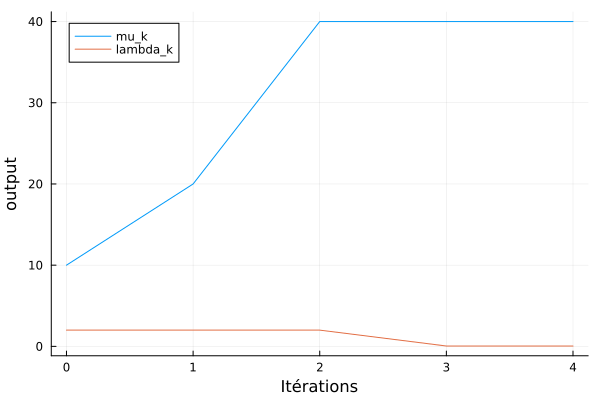

In [17]:
f = fct2
gradf=grad_fct2
hessf = hess_fct2

c = contrainte2
gradc = grad_contrainte2
hessc = hess_contrainte2

x0 = [5,5]
x_sol, f_sol, flag, nb_iters, mus, lambdas = lagrangien_augmente(
    f,
    gradf,
    hessf, 
    c,
    gradc,
    hessc,
    x0;
    tau=2
)

afficher_resultats("Lagrangien augmente", "f2", x0, x_sol, f_sol, flag, nb_iters, sol_fct2_augm)
plot(0:nb_iters, mus, xlabel="Itérations", ylabel="output", label="mu_k")
plot!(0:nb_iters, lambdas, label="lambda_k")

Une décroissante de $\lambda_k$ est généralement un indicateur de convergence de l'algorithme. Au début, l'algorithme n'impose pas fortement la contrainte, à mesure que la solution converge, le poids de la contrainte augmente via le facteur de pondération $\lambda_k$.

$\mu_k$ évolue aussi pour pénaliser plus ou moins le non respect de la contrainte, il croît en général mais peut décroître si la contrainte est déjà largement respectée. 

### 2.

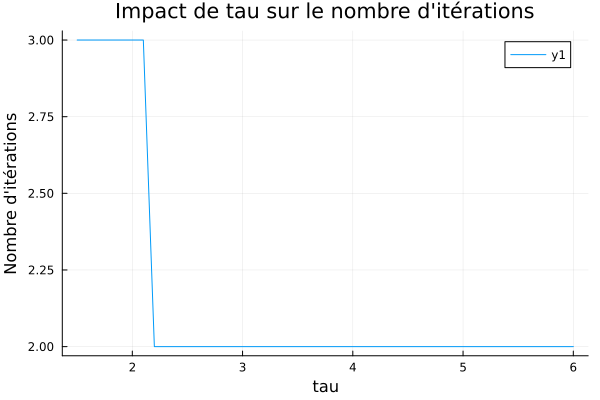

In [18]:
y = []

f = fct2
gradf=grad_fct2
hessf = hess_fct2

c = contrainte2
gradc = grad_contrainte2
hessc = hess_contrainte2

x0 = [50,50]

for tau = 1.5:0.1:6
x_sol, f_sol, flag, nb_iters, mus, lambdas = lagrangien_augmente(
    f,
    gradf,
    hessf, 
    c,
    gradc,
    hessc,
    x0;
    tau=tau
)
    if norm(x_sol-sol_fct2_augm) > 0.01
        println("faux pour tau=", tau)
    end
    y = vcat(y, [nb_iters]) 

    
    
end 

plot(1.5:0.1:6, y, xlabel="tau", ylabel="Nombre d'itérations", title="Impact de tau sur le nombre d'itérations")

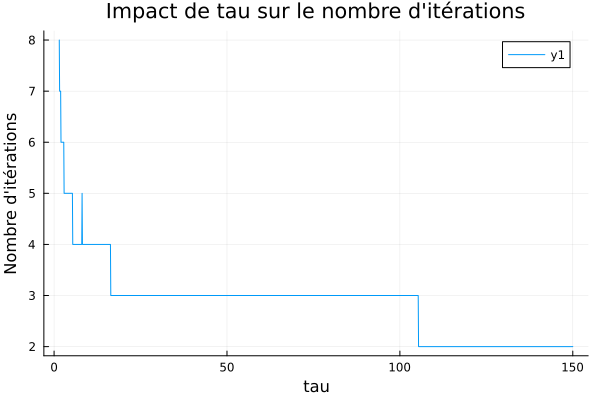

In [22]:
y = []

f = fct1
gradf=grad_fct1
hessf = hess_fct1

c = contrainte1
gradc = grad_contrainte1
hessc = hess_contrainte1

x0 = [500, 500, 500]

for tau = 1.5:0.1:150
x_sol, f_sol, flag, nb_iters, mus, lambdas = lagrangien_augmente(
    f,
    gradf,
    hessf, 
    c,
    gradc,
    hessc,
    x0;
    tau=tau
)
   
    y = vcat(y, [nb_iters]) 

    
    
end 

plot(1.5:0.1:150, y, xlabel="tau", ylabel="Nombre d'itérations", title="Impact de tau sur le nombre d'itérations")

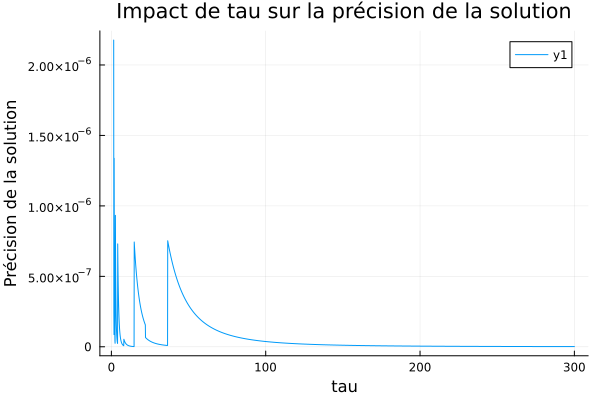

In [24]:
y = []

f = fct1
gradf=grad_fct1
hessf = hess_fct1

c = contrainte1
gradc = grad_contrainte1
hessc = hess_contrainte1

x0 = [50,50, 50]

for tau = 1.5:0.1:300
    x_sol, f_sol, flag, nb_iters, mus, lambdas = lagrangien_augmente(
        f,
        gradf,
        hessf, 
        c,
        gradc,
        hessc,
        x0;
        tau=tau
    )
    y = vcat(y, [norm(x_sol-sol_fct1_augm)]) 

    
    
end 

plot(1.5:0.1:300, y, xlabel="tau", ylabel="Précision de la solution", title="Impact de tau sur la précision de la solution")

Augmenter $\tau$ permet de diminuer le nombre d'itérations de l'algorithme et donc ses performances.
Pour des valeurs très grandes, on garantit également une bonne précision de la solution de l'algorithme.